## Basic Deep Learning

#### Cats and dogs classification

#### Prepare for dataset

In [1]:
import os,shutil

# download dataset from kaggle and unzip it
original_dataset_dir = 'C:/Users/zjiax/Desktop/Projects/dogs_cats_classification/train/'

# set the name of each level of the dataset
base_dir = 'data'
data_dirs = ['train','validation','test']
class_dirs = ['cat','dog']

# select appropriate  number of pictures to train/validation/test
images = {
    'train':[0,1000],
    'validation':[1000,1500],
    'test':[1500,2000],
}

In [2]:
for d in data_dirs:
    for c in class_dirs:
        # construct the catalogue, e.g.'data/train/dog'
        dataset_dir = f"{base_dir}/{d}/{c}/"
        
        #The os.makedirs () method is used to create directories recursively
        os.makedirs(dataset_dir,exist_ok=True)
        
        # construct file name e.g.'cat.1.jpg'
        fnames = [f'{c}.{i}.jpg' for i in range(images[d][0],images[d][1])]
        
        #copy the selected images into corresponding dataset catalogue
        for fname in fnames:
            shutil.copyfile(original_dataset_dir + fname, dataset_dir + fname)

#### Construct Convolutional Neural Network Model

In [4]:
from keras import models, layers, optimizers

Using TensorFlow backend.


In [8]:
model = models.Sequential()

model.add(layers.Conv2D(32,(3,3),activation = 'relu',input_shape = (150,150,3)))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(64,(3,3),activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
          
model.add(layers.Conv2D(128,(3,3),activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
          
model.add(layers.Conv2D(128,(3,3),activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
          
model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

#### Model Visualization

In [9]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)      

#### Model Compiling

#### Arguments
optimizer: String (name of optimizer) or optimizer instance.

loss: String (name of objective function) or objective function.
    If the model has multiple outputs, you can use a different loss
    on each output by passing a dictionary or a list of losses.
        
metrics: List of metrics to be evaluated by the model during training and testing.
      Typically you will use `metrics=['accuracy']`.
       To specify different metrics for different outputs of a multi-output model, you could also pass A a dictionary.

In linear regression problems, MSE (Mean Squared Error) is often used as the loss function, and cross entropy is often used as the loss function in the classification problem. 

Cross entropy can measure the degree of difference between two different probability distributions in the same random variable. In machine learning, it is expressed as the difference between the true probability distribution and the predicted probability distribution. The smaller the value of cross entropy, the better the model prediction effect.

In [12]:
model.compile(loss='binary_crossentropy', 
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

#### Data Preprocessing

(1) Read the image file.

(2) Decode the JPEG file into an RGB pixel grid.

(3) Convert these pixel grids to floating-point tensors.

(4) Scale the pixel value (in the range of 0 ~ 255) to [0, 1].

In [13]:
from keras.preprocessing.image import ImageDataGenerator

In [15]:
# Use ImageDataGenerator to read image from directory and implement batch data enhancement
train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)
# Create training dataset ImageGenerator, which has 1000 for dogs and 1000 for cats
# Obtain the directory path and generate a batch of enhanced data
train_generator = train_datagen.flow_from_directory(
                    'data/train',
                    target_size = (150,150),
                    batch_size = 20,
                    class_mode = 'binary')

# Create test dataset ImageGenerator, which has 500 for dogs and 500 for cats
# Obtain the directory path and generate a batch of enhanced data
test_generator = test_datagen.flow_from_directory(
                'data/test',
                target_size = (150,150),
                batch_size = 20,
                class_mode = 'binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [16]:
for data_batch, labels_batch in train_generator:
    print(f'data_batch.shape:{data_batch.shape}')
    print(f'labels_batch.shape:{labels_batch.shape}')
    break

data_batch.shape:(20, 150, 150, 3)
labels_batch.shape:(20,)


#### Model Training

https://keras.io/zh/models/model/

keras.models.fit(
self,
x=None, #训练数据
y=None, #训练数据label标签
batch_size=None, #每经过多少个sample更新一次权重，defult 32
epochs=1, #训练的轮数epochs
verbose=1, 0为不在标准输出流输出日志信息，1为输出进度条记录，2为每个epoch输出一行记录
callbacks=None,
list，list中的元素为keras.callbacks.Callback对象，在训练过程中会调用list中的回调函数
validation_split=0., #浮点数0-1，将训练集中的一部分比例作为验证集，然后下面的验证集validation_data将不会起到作用
validation_data=None, #验证集
shuffle=True, 布尔值和字符串，如果为布尔值，表示是否在每一次epoch训练前随机打乱输入样本的顺序，如果为"batch"，为处理HDF5数据
class_weight=None, 
dict,分类问题的时候，有的类别可能需要额外关注，分错的时候给的惩罚会比较大，所以权重会调高，体现在损失函数上面
sample_weight=None, #array,和输入样本对等长度,对输入的每个特征+个权值，如果是时序的数据，则采用(samples，sequence_length)的矩阵
initial_epoch=0, 如果之前做了训练，则可以从指定的epoch开始训练
steps_per_epoch=None, 将一个epoch分为多少个steps，也就是划分一个batch_size多大，比如steps_per_epoch=10，则就是将训练集分为10份，不能和batch_size共同使用
返回的是一个History对象，可以通过History.history来查看训练过程，loss值等等

In [17]:
history = model.fit_generator(train_generator,
                              steps_per_epoch=50,
                              epochs=30,
                              validation_data = test_generator,
                              validation_steps = 50)

Epoch 1/30
50/50 [==============================] - 36s 711ms/step - loss: 0.6920 - acc: 0.5350 - val_loss: 0.6630 - val_acc: 0.5000
Epoch 2/30
50/50 [==============================] - 28s 569ms/step - loss: 0.6875 - acc: 0.5500 - val_loss: 0.6774 - val_acc: 0.5270
Epoch 3/30
50/50 [==============================] - 30s 605ms/step - loss: 0.6615 - acc: 0.6120 - val_loss: 0.6969 - val_acc: 0.6100
Epoch 4/30
50/50 [==============================] - 31s 616ms/step - loss: 0.6590 - acc: 0.6150 - val_loss: 0.6306 - val_acc: 0.6470
Epoch 5/30
50/50 [==============================] - 31s 611ms/step - loss: 0.6397 - acc: 0.6380 - val_loss: 0.6217 - val_acc: 0.6510
Epoch 6/30
50/50 [==============================] - 31s 613ms/step - loss: 0.6268 - acc: 0.6530 - val_loss: 0.5834 - val_acc: 0.6520
Epoch 7/30
50/50 [==============================] - 30s 604ms/step - loss: 0.6031 - acc: 0.6810 - val_loss: 0.6993 - val_acc: 0.6790
Epoch 8/30
50/50 [==============================] - 30s 597ms/step - 

### Model Save

In [28]:
model.save('cats_and_dogs_sample.h5')

#### Model Evaluation

In [18]:
import matplotlib.pyplot as plt

In [19]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']


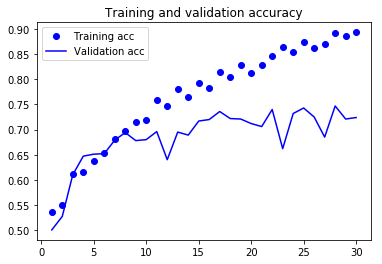

In [27]:
epochs = range(1,len(acc) + 1)
plt.plot(epochs, acc, 'bo',label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title('Training and validation accuracy')
plt.legend() # Add notes
plt.show()

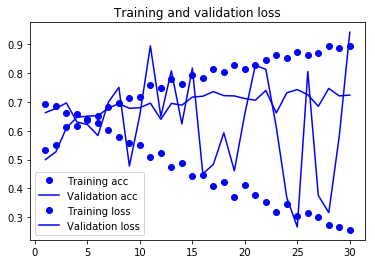

In [26]:
plt.figure()

plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()